# ラボ1 量子回路

前提条件

- [Qiskitの基本](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)
- [Ch.1.2 計算の原子](/course/ch-states/the-atoms-of-computation)

その他の関連資料

- [IBM Quantum Systemsにアクセスする](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [IBM Quantum Systemsの構成](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [トランスパイル](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantum アカウント](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [量子回路](https://qiskit.org/documentation/apidoc/circuit.html) 

In [4]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

## パート1：量子回路における古典的な論理ゲート

**ゴール**

NOTゲート（Qiskitではxとして表されます）、CNOTゲート（Qiskitではcxとして表されます）、およびToffoliゲート（Qiskitではccxとして表されます）を使用して、XOR、AND、NAND、およびORゲートを計算できる量子回路関数を作成します。

例として、 `NOT`ゲートの実装を示します。

In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw()
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

NOT with input 0 gives output 1


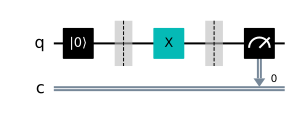

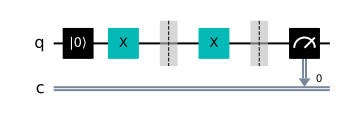

In [3]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

### 📓 XORゲート

2つのバイナリー文字列を入力として受け取り、1つのバイナリー文字列を出力します。

入力が等しい場合、出力は<code>'0'</code>であり、そうでない場合、出力は<code>'1'</code>です。

In [2]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [1]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

### 📓 ANDゲート

2つのバイナリー文字列を入力として受け取り、1つのバイナリー文字列を出力します。

両方の入力が`'1'`の場合にのみ、出力は`'1'`になります。

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [2]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

### 📓 NANDゲート

2つのバイナリー文字列を入力として受け取り、1つのバイナリー文字列を出力します。

両方の入力が`'1'`の場合にのみ、出力は`'0'`になります。

In [8]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [3]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

### 📓 ORゲート

2つのバイナリー文字列を入力として受け取り、1つのバイナリー文字列を出力します。

いずれかの入力が<code>'1'</code>の場合、出力は<code>'1'</code>です。

In [10]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [4]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

## パート2：量子コンピューターのANDゲート

**ゴール**

2つの量子システムでANDゲートを実行し、さまざまな回路特性が結果にどのように影響するかを学習します。

パート1では、量子ゲートから`AND`ゲートを作成し、シミュレーターで実行しました。ここパート2では、もう一度やりますが、代わりに実機の量子コンピューターで回路を実行します。実機の量子システムを使用する場合、覚えておくべきことの1つは、現在の量子コンピューターはフォールトトレラントではないということです。これらにはノイズが入ります。

量子系の「ノイズ」は、起こるべきではないが、それでも起こるすべてのことの集合的な影響です。出力でのノイズの結果は、必ずしも私たちが期待するものではありません。量子回路のすべてのプロセスに関連するノイズがあります：初期状態の準備、ゲートの適用、および量子ビット測定。ゲートの場合、ノイズレベルはゲート間および量子ビット間で異なる可能性があります。 `cx`ゲートは通常、単一量子ビットのゲートよりもノイズが多くなります。

ここでは、IBM Quantum Experienceの量子システムを使用します。アクセスがない場合は、 [ここに](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)アクセスの手法が載っています。

これで、実際の量子コンピューターを使用する準備が整いました。始めましょう。

### ステップ1. デバイスの選択

まず、次のセルを実行して、ディスクに保存されている資格情報からアカウントをロードします。

In [17]:
IBMQ.load_account()

アカウントが読み込まれると、下のセルを実行してアクセスできるプロバイダーのリストが表示されます。各プロバイダーは、それぞれ異なるシステムを提供しています。オープン・ユーザーの場合、通常、プロバイダーは1つだけです`ibm-q/open/main`：

In [16]:
IBMQ.providers()

`get_provider`を使用してプロバイダーを取得しましょう。コマンド`provider.backends()`は、選択したプロバイダーから利用できるバックエンドのリストを表示します。

In [15]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

これらのオプションの中から、回路を実行するシステムの1つを選択できます。 `ibmq_qasm_simulator`以外は、実機の量子コンピューターです。このシステム間の違いは、量子ビットの数、量子ビットの接続性、およびシステムエラー率にあります。

次のセルを実行すると、選択したバックエンドに関するすべての情報を表示するウィジェットが表示されます。タブをクリックすると、必要な情報を入手できます。たとえば、バックエンドステータス、量子ビット数、および接続は[ `configuration` ]タブにありますが、[ `Error Map` ]タブにはシステムの最新のノイズ情報が表示されます。 

In [9]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_lima')
backend_ex

ANDゲート回路には、3量子ビット以上のバックエンドが必要です。これは、 `ibmq_armonk`を除くすべての実機システムがこれに当てはまります。以下は、バックエンドをフィルタリングする方法の例です。ここでは、量子ビットの数で<br>フィルタリングし、シミュレーターを削除します。

In [8]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

システムを選択する便利な方法の1つは、 `least_busy`関数を使用して、ジョブのキュー数が最も少ないバックエンドを取得することです。この手法でシステムを選択する場合の欠点は、エラー率の低いシステムの方が人気があるため、結果の精度が比較的悪くなる可能性があることです。

In [17]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

実機の量子コンピューターは定期的に再キャリブレーションする必要があり、特定の量子ビットまたはゲートの忠実度は時間の経過とともに変化する可能性があります。したがって、どのシステムがより少ないエラーで結果を生成するかはさまざまです。

この演習では、IBM Quantumシステムの1つである`ibmq_quito`を選択します。

In [2]:
# run this cell
backend = provider.get_backend('ibmq_quito')

### ステップ2. 実際のデバイスのAND関数を定義する

ここで、AND関数を定義します。最終結果の変動を減らすために、ショット数として8192を選択します。これは、オープンなIBM system の最大ショット数です。関連情報は [ここ](https://quantum-computing.ibm.com/docs/manage/backends/configuration)でよく説明されています

#### Qiskit トランスパイラー

実機の量子コンピューターで回路を実行する場合、通常、選択したバックエンドに対して回路をトランスパイルして、量子コンピューターが実際に実行できるゲートのみを回路に含める必要があることを知っておくことが重要です。主な内容は、回路内の 2量子ビットゲートが、実際に実行できるデバイス上の量子ビットのペアにマップされるようするためのswapゲートの追加することです。次のセルは、Toffoli ゲートとして表現された AND ゲートを、単一量子ビットゲートと 2量子ビットゲートに分解したものです。これらは、IBM ハードウェアで実行できる唯一のタイプのゲートです。

In [5]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the required connectivity')
qc_and.decompose().draw()

AND gate


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘



Transpiled AND gate with all the required connectivity


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ TDG ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

さらに、トランスパイラーが実行する最適化によって、ゲート数全体が減少し、入力回路の全長が減少することがよくあります。デバイストポロジーに一致するswapの追加と、回路の長さを短縮するための最適化は、互いに対立していることに注意してください。以下では、計算に使用するデバイス上の量子ビットを選択できる`initial_layout`と、回路スワップマッピングと実行する最適化手法を内部デフォルトから選択できる`optimization_level`の引数を使用することにします。

トランスパイル機能の詳細については、[こちら](https://qiskit.org/documentation/apidoc/transpiler.html)をご覧ください。

トランスパイルステップを含めて、実機のシステムに対して、Part1のAND関数を適切に変更してみましょう。

In [ ]:
from qiskit.tools.monitor import job_monitor

In [6]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

量子システムにジョブを送信すると、 `job_monitor`は送信されたジョブがパイプラインのどこにあるかを追跡し始めます。

まず、下のセルを実行して、ウィジェットから`ibmq_quito`を調べます。

In [ ]:
backend

📓 エラーマップを考慮して3量子ビットの初期レイアウトを決定し、それをリスト変数layout2に割り当てます。

In [ ]:
layout =

📓 初期レイアウトを選択した理由を説明してください。

**あなたの答え：** 

以下のセルを実行して、 `ibmq_quito`で`AND`ゲートを実行します。

In [ ]:
output_all = []
qc_trans_all = []
prob_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans, output = AND(input1, input2, backend, layout)
        
        output_all.append(output)
        qc_trans_all.append(qc_trans)
        
        prob = output[str(int( input1=='1' and input2=='1' ))]/8192
        prob_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

### ステップ3. 結果を解釈する

回路を区別するいくつかの量があります。その中で最も重要なのは**回路の深さ**です。回路の深さは[ここ](https://qiskit.org/documentation/apidoc/circuit.html)で詳細に定義されています（補足情報を参照し、[量子回路のプロパティ]タブをクリックしてください）。回路の深さは回路内のゲートの数に比例し、ハードウェア上の回路の実行時間に大まかに対応します。したがって、回路の深さは計算が容易な指標であり、実行された回路の忠実度を推定するために使用することができます。

2番目の重要な値は、回路内の**非ローカル**（複数量子ビット）**ゲート**の数です。 IBM Quantumシステムでは、物理的に実行できる唯一の非ローカル・ゲートはCNOTゲートです。 CNOTゲートは実行するのに最も高価なゲートであるため、これらのゲートの総数は、最終出力の精度の優れたベンチマークとしても機能することを思い出してください。

#### 回路の深さと結果の精度

以下のセルを実行すると、 `ibm_lagos`で実行された対応する入力とそれらの回路の深さを含む4つのトランスパイルANDゲート回路図が表示され、正解を生成する成功確率が示されます。

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[0]) )
qc_trans_all[0].draw()

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[1]) )
qc_trans_all[1].draw()

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[2]) )
qc_trans_all[2].draw()

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[3]) )
qc_trans_all[3].draw()

📓 回路の非類似性の理由を説明してください。回路の特性と結果の精度との関係を説明してください。

**あなたの答え：**